In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('datasets/titanic.txt')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dictionary

|Variable|	Definition	|Key
|--------|--------|--------|
|survival|	Survival	|0 = No, 1 = Yes
|pclass|	Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd
|sex|	Sex	|
|Age|	Age in years	|
|sibsp|	# of siblings / spouses aboard the Titanic	 |
|parch|	# of parents / children aboard the Titanic	|
|ticket|	Ticket number	|
|fare|	Passenger fare|
|cabin|	Cabin number	|
|embarked|	Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton

## Variable Notes
**pclass:** A proxy for socio-economic status (SES)</br>
- 1st = Upper
- 2nd = Middle
- 3rd = Lower 
 
 
**age:** </br>
Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 </br>
- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson </br>
Some children travelled only with a nanny, therefore parch=0 for them.

## EDA

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['Pclass'].mode()

0    3
Name: Pclass, dtype: int64

In [ ]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

**Observations**
- disregard mean and std for PassengerID because it has no meaning
- class 3 is the most common, class 1 is the second most common
- 29 is the average age on the Titanic
- oldest person on the ship was 80 yrs old
- min is 0 maybe some travelers worked on the ship
- average ticket cost was 32 and highest was 512

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

- Notice how the % of flag 1 matches the average. that's another way to check
- The data is imbalanced, but it's not that bad. if it were 90:10 then we need ot do something about it. Basically, the model is learning more about the not-survived data.

<Axes: ylabel='Age'>

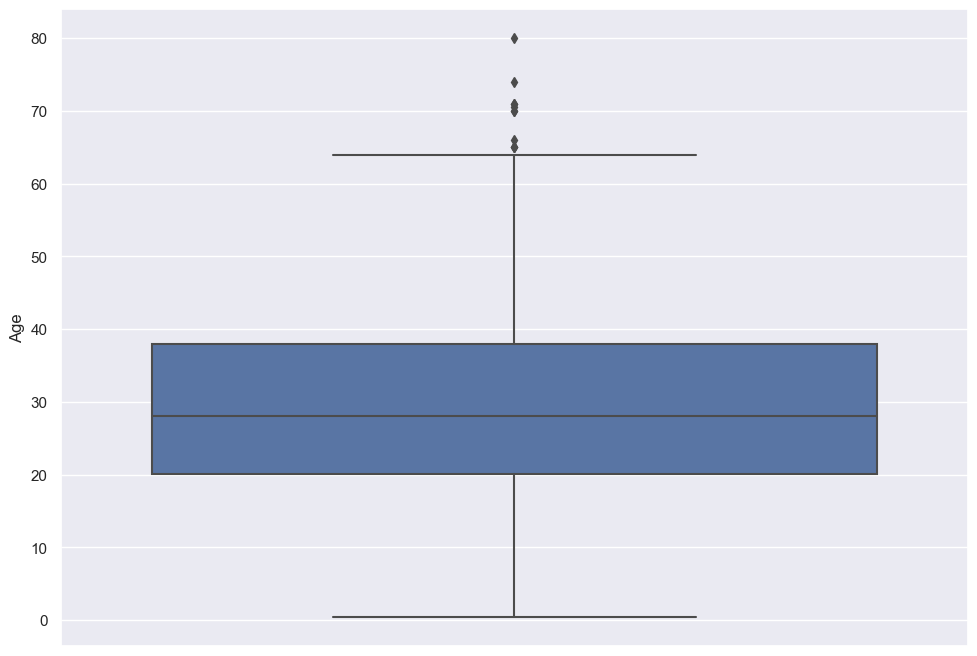

In [ ]:
import seaborn as sns
sns.boxplot(y=df['Age'])

<Axes: xlabel='Embarked', ylabel='count'>

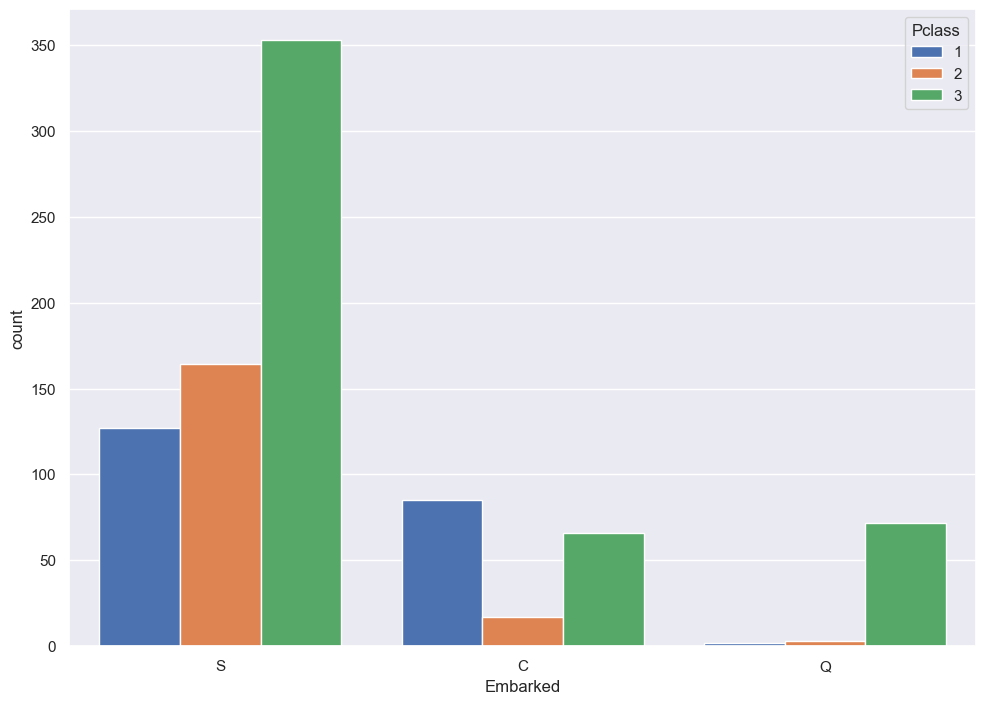

In [ ]:
sns.countplot(x=df['Embarked'], saturation=1, hue=df['Pclass'])

<Axes: ylabel='Survived'>

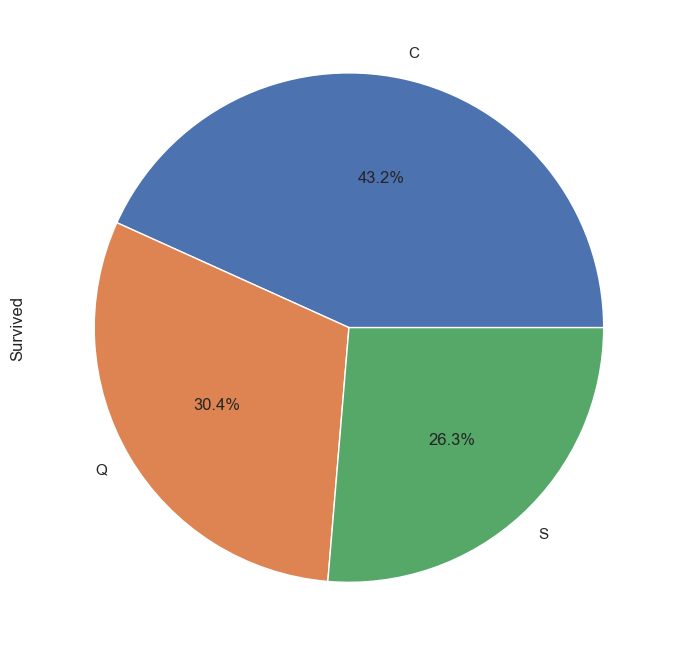

In [ ]:
df.groupby('Embarked')['Survived'].mean().plot(kind='pie',autopct='%1.1f%%')

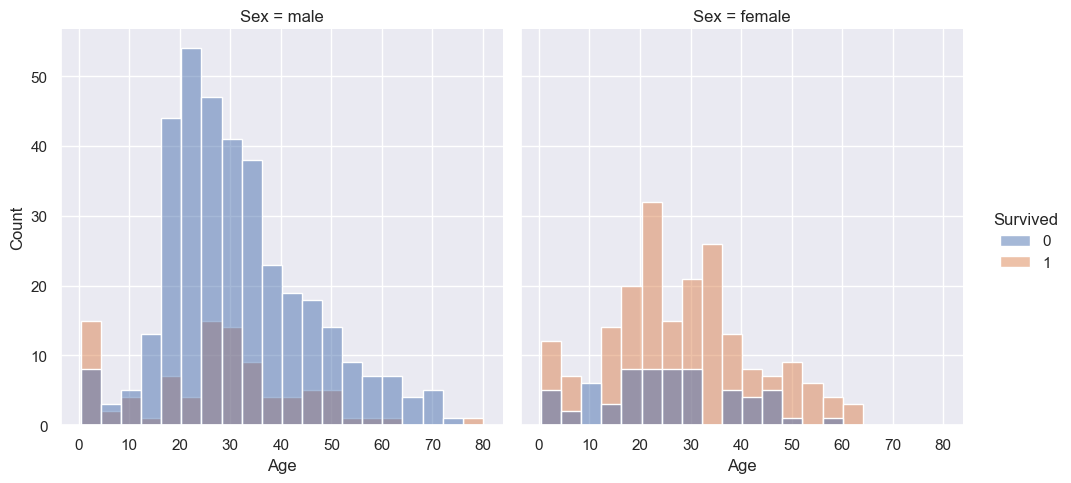

In [ ]:
sns.displot(x=df['Age'], col=df['Sex'], hue=df['Survived'])

**Obs**
- Viz above proves our common (domain knowledge) about the Titanic crisis that female and some children survived more than men
- We can say that the sample we have in this project is a good representative of the population

In [ ]:
#lets check the survival rate of males as opposed to females.
total_males = len(df[df['Sex'] == 'male'])
surviving_males = df[(df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0]
percentage_surviving_males = (surviving_males / total_males) * 100
print('percentage of surviving males:',round(percentage_surviving_males,2), '%')

percentage of surviving males: 18.89 %


In [ ]:
#lets check the survival rate of males as opposed to females.
total_females = len(df[df['Sex'] == 'female'])
surviving_females = df[(df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]
percentage_surviving_females = (surviving_females / total_females) * 100
print('percentage of surviving females:',round(percentage_surviving_females,2), '%')

percentage of surviving females: 74.2 %


In [ ]:
#lets see of all the survivors how many were children (1-12 year olds).
total_children = len(df[df['Age'] <=12 ])
surviving_children = df[(df['Age'] <= 12 ) & (df['Survived'] == 1)].shape[0]
percentage_surviving_children = (surviving_children / total_children) * 100

print(round(percentage_surviving_children,2),'% of all Children survived')

57.97 % of all Children survived


Let's check if people who had a high fair got a special treatment and survived

<Axes: xlabel='Pclass', ylabel='count'>

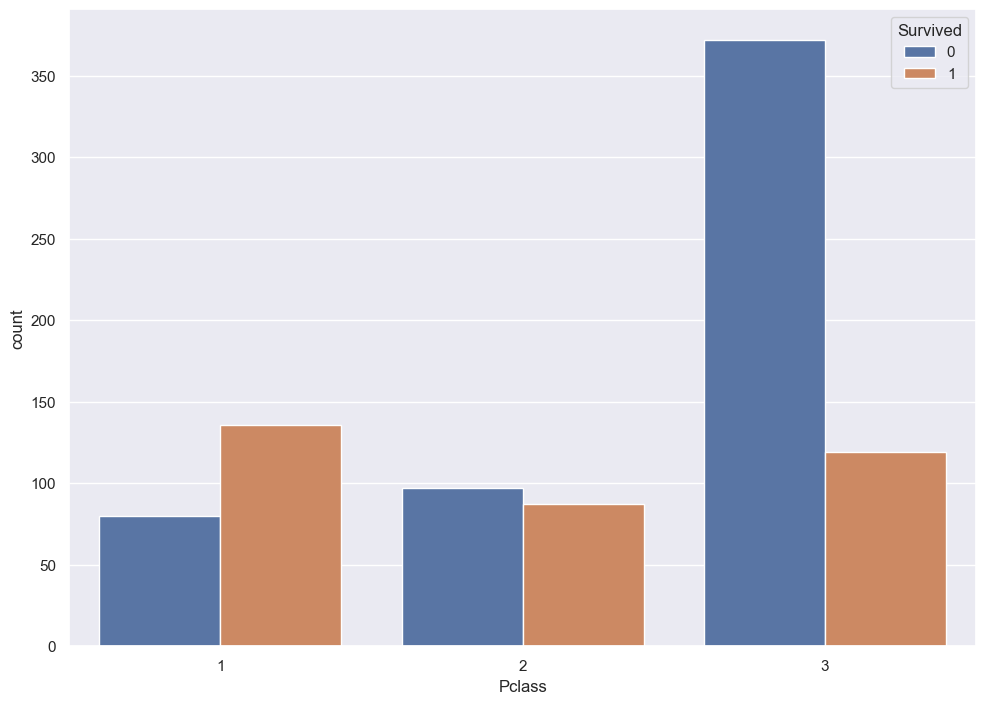

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=df['Pclass'],hue=df['Survived'])

## Data Preprocessing

Doing some feature engineering can help improve the performance of machine learning models on the Titanic dataset. 

Here are some examples of feature engineering we could apply:

- Encode categorical features like Sex and Embarked as dummy variables
- Extract titles from the Name column and encode as a title feature
- Use feature bins for Age rather than numeric representation
- Create family size feature from SibSp and Parch
- Create is_alone feature based on family size
- Extract cabin letter and cabin number from Cabin feature
- Use domain knowledge to create new features like is_child

Here is how we could implement some of these ideas in Python before fitting a model:



In [ ]:
df_orig = df

In [ ]:
cat_feat = df.select_dtypes(exclude=['int', 'float']).columns
cat_feat

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

### Encoding

#### OneHotEncoding

In [ ]:
# Perform one-hot encoding on Embarked
df = pd.get_dummies(df, columns=['Embarked','Sex'], dtype=int)
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0,0,1


`Pclass` doesn't need encoding as it's already encoded with label encoder.

The choice between label encoding and one-hot encoding depends on the specific characteristics of the categorical feature and the requirements of your analysis or modeling task. Here are some considerations for when to use each encoding technique:

**Label Encoding:**
- Use label encoding when the categorical feature has an inherent order or ordinal relationship.
- Label encoding assigns a unique numerical label to each category, preserving the ordinal relationship between the categories.
- It is suitable when the categories have a natural ordering, such as "low," "medium," and "high" or "small," "medium," and "large."
- Some algorithms can benefit from the ordinal nature of label encoding, as they can capture the relative differences between the categories.
- Be cautious when using label encoding with algorithms that assume numerical values have a specific meaning or magnitude, as it may introduce unintended ordinal relationships.

**One-Hot Encoding:**
- Use one-hot encoding when the categorical feature does not have an inherent order or when the categories are nominal (unordered).
- One-hot encoding creates binary columns for each category, representing the presence or absence of that category in each observation.
- It is suitable when the categories are not naturally ordered or when there is no meaningful numerical relationship between them.
- One-hot encoding ensures that each category is treated as a separate and independent feature, avoiding any false ordinal relationship.
- One-hot encoding is commonly used with algorithms that cannot directly handle categorical variables or when nominal variables need to be represented numerically.

In summary, label encoding is appropriate when there is an inherent order or ordinal relationship between the categories. It retains the ordinality but introduces the risk of artificial relationships. One-hot encoding is suitable when the categories are nominal or do not have a natural order. It ensures independence among the categories but increases the dimensionality of the dataset.

Remember that the choice of encoding technique depends on the specific characteristics of your data and the requirements of your analysis or modeling task. It is crucial to understand the nature of the categorical feature and the implications of different encoding methods on the analysis or model's performance.

### Imputation

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

- Cabin number information could be irrelevent and has a large number of missing values. Let's ignore it.
- Age is the most important one to imputate 

In [ ]:
# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

There are a few reasons I chose to fill the missing Age values with the median rather than the mean or some other value:

- The Age column has several missing values. Filling with the median handles missing data in a reasonable way.

- Age is not normally distributed but skewed right in the Titanic dataset. So the mean is pulled higher than the median.

- Using the median (50th percentile) to fill missing ages gives a sensible central value that maintains the distribution.

- Filling with a value like 0 or average would distort the distribution and affect relationships with other features.

- Median is less sensitive to outliers than the mean. So it is more robust for imputation.

- Logistic regression assumes linear relationships between the independent variables and log odds. Median maintains this better than mean.

- For tree-based models like random forests, median and mean may give comparable results. But median is still a safer central tendency measure.

So in summary, the median is a good central value that works well for imputation generally. It maintains the Age distribution better than mean or other values would. This leads to better model training.

In [ ]:
# more sophisticated imputation
df[df['Name'].str.contains('Master')].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0,0,1
16,17,0,3,"Rice, Master. Eugene",0,2.0,4,1,382652,29.1250,NaN,0,1,0
50,51,0,3,"Panula, Master. Juha Niilo",0,7.0,4,1,3101295,39.6875,NaN,0,0,1
59,60,0,3,"Goodwin, Master. William Frederick",0,11.0,5,2,CA 2144,46.9000,NaN,0,0,1
63,64,0,3,"Skoog, Master. Harald",0,4.0,3,2,347088,27.9000,NaN,0,0,1


In [ ]:
#replace nulls with the following
df[df['Name'].str.contains('Master')]['Age'].mean()

6.91675

### Binning

In [ ]:
# bucket age into bins with numerical labels
# let's also encode those bins to avoid having categorical intervals
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 65, 99], labels=[1, 2, 3, 4])  

In [ ]:
df['AgeBin'].unique()

[3, 1, 2, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

In pandas, when you use the cut method to bin values into discrete intervals, the bins are, by default, considered as left-closed (inclusive) intervals. I

### Feature Extraction

- let's combine siblings with spouse, and parent with child fields together
- create a new field called IsAlone for people that are traveling alone

In [ ]:
# Create family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FamilySize'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64

In [ ]:
# Create is_alone feature
#df['IsAlone'] = df['FamilySize'].map(lambda x: 1 if x==1 else 0)
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)
df.head()

Can TravelAlone be predictive of survival?

<Axes: ylabel='IsAlone'>

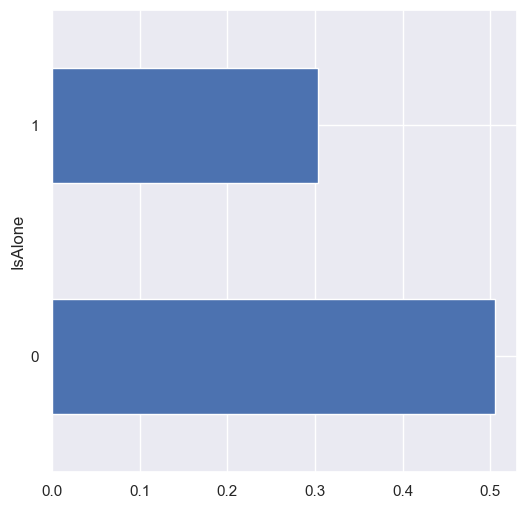

In [78]:
df.groupby('IsAlone')['Survived'].mean().plot(kind='barh', figsize=(6,6))

The answer is very likely because the ones that did not travel alone had bigger chances of survival:
- children and women had priority over men
- children do not travel alone

Now that we have all necessary columns, let's drop columns like ticket, cabin, SibSp, etc..

In [70]:
df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis =1)

In [71]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_female', 'Sex_male', 'FamilySize', 'IsAlone'],
      dtype='object')

### Feature and Target Prep

- designate X and Y values
- preprocess the data and create a scaler to standardize the data points

In [72]:

# Use these new engineered features for modeling
X = df.drop(['Survived'], axis=1)
# or use
#df[['Sex', 'AgeBin', 'FamilySize', 'IsAlone', 'Fare', 
#        'Pclass', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

Y = df['Survived']

Scaling is important because it helps ML models find the most optimal algorithm faster when you have 0 to 1 scale (faster convergence)

`MinMaxScaler` and `StandardScaler` are data scaling techniques used to transform numerical features to a specific scale. 

Here's an overview of each technique along with examples in Python using scikit-learn:

**MinMaxScaler:**
- MinMaxScaler scales the data to a specific range, typically between 0 and 1. It preserves the relative relationships between data points.




In [73]:
from sklearn.preprocessing import MinMaxScaler

# Example data
data = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)

# Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

scaled_data

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])



**StandardScaler:**
- StandardScaler standardizes the data to have a mean of 0 and a standard deviation of 1. It centers the data around the mean and adjusts the spread based on the standard deviation.


In [74]:
from sklearn.preprocessing import StandardScaler

# Example data
data = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)

# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print(scaled_data)

[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]


![sc](https://media.geeksforgeeks.org/wp-content/uploads/20200519001052/2020-05-18-21.png)

**Robust Scaling:**

Robust scaling is a method used in statistics and machine learning to scale features by removing the median and scaling data based on the interquartile range (IQR). It is robust to outliers, meaning that extreme values in the data do not unduly influence the scaling. Robust scaling is particularly useful when dealing with datasets that contain outliers.


Here is a table that summarizes the key differences between MinMaxScaler and StandardScaler:

| Feature | MinMaxScaler | StandardScaler |
|---|---|---|
| Range | Scales the data to a fixed range, typically between 0 and 1 | Scales the data to have a mean of 0 and a standard deviation of 1 |
| Distribution | Not sensitive to the distribution of the data | Sensitive to the distribution of the data |
| Outliers | Sensitive to outliers | Not sensitive to outliers |
| Use cases | Good for datasets with a large range of values or neural networks| Good for datasets with a normal distribution or regression models|



Here are some additional considerations when choosing between MinMaxScaler and StandardScaler:

* **MinMaxScaler is more sensitive to outliers than StandardScaler.** This means that if there are outliers in the data, MinMaxScaler will shrink or expand the range of the data to accommodate them. This can sometimes distort the data and make it less representative of the population.
* **StandardScaler is not sensitive to outliers.** This means that StandardScaler will not be affected by outliers in the data. This makes StandardScaler a more robust choice for datasets that contain outliers.
* **MinMaxScaler is a good choice for datasets with a large range of values.** This is because MinMaxScaler will scale the data to a fixed range, regardless of the distribution of the data. This can be helpful for datasets with a large range of values, as it can make the data easier to work with and can improve the performance of machine learning algorithms.
* **StandardScaler is a good choice for datasets with a normal distribution.** This is because StandardScaler will scale the data to have a mean of 0 and a standard deviation of 1, which is the definition of a normal distribution. This can be helpful for datasets with a normal distribution, as it can make the data more representative of the population and can improve the performance of machine learning algorithms.

Ultimately, the best choice of scaler depends on the specific dataset and the machine learning algorithm that is being used. If you are unsure which scaler to use, it is a good idea to experiment with both MinMaxScaler and StandardScaler to see which one works better for your dataset.

In [75]:
trans_MM = MinMaxScaler()

In [76]:
df_MM = trans_MM.fit_transform(X)
X_trans = pd.DataFrame(df_MM, columns=X.columns)
X_trans

,Pclass,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,FamilySize,IsAlone
0,1.0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.1,0.0
1,0.0,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.1,0.0
2,1.0,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.434531,0.103644,0.0,0.0,1.0,1.0,0.0,0.1,0.0
4,1.0,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0.5,0.334004,0.025374,0.0,0.0,1.0,0.0,1.0,0.0,1.0
887,0.0,0.233476,0.058556,0.0,0.0,1.0,1.0,0.0,0.0,1.0
888,1.0,NaN,0.045771,0.0,0.0,1.0,1.0,0.0,0.3,0.0
889,0.0,0.321438,0.058556,1.0,0.0,0.0,0.0,1.0,0.0,1.0


Now the data has some more informative features that can be used to train machine learning models. The embeddings help capture non-linear relationships.

Feature engineering requires domain expertise but can really boost model accuracy by creating more explanatory features.

In [80]:
df['AgeBin'].unique()

[3, NaN, 1, 2, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans, Y, test_size=0.25)

Then, the code creates the model. In this case, we are using a logistic regression model. Logistic regression is a type of machine learning algorithm that can be used to predict binary outcomes.

The model is trained on the training set. Once the model is trained, it can be used to predict the survival of new passengers.

Finally, the code evaluates the model. The accuracy of the model is calculated by comparing the predicted survivals to the actual survivals.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)

print('Accuracy:', score)

Accuracy: 0.820627802690583


This means that the model correctly predicts the survival of 81.1% of the passengers in the test set.

The accuracy score of a machine learning model is a measure of _how well the model predicts the correct outcome_. A higher accuracy score indicates that the model is more accurate. However, the accuracy score of a machine learning model can vary depending on the dataset and the machine learning algorithm that is being used.

There is no single answer to the question of what is a good accuracy score for a machine learning model. The accuracy score that is considered good depends on the specific dataset and the machine learning algorithm that is being used. However, some general guidelines can be used to assess the accuracy of a machine learning model.

* **A accuracy score of 90% or higher is generally considered good.** This means that the model correctly predicts the correct outcome 90% of the time.
* **A accuracy score of 80% or higher is also considered good.** This means that the model correctly predicts the correct outcome 80% of the time.
* **A accuracy score of 70% or higher is considered acceptable.** 
* **A accuracy score of 60% or lower is considered poor.** 

It is important to note that the accuracy score of a machine learning model is _not the only measure of the model's performance_. Other measures, such as precision and recall, can also be used to assess the performance of a machine learning model.

Here are some additional factors to consider when evaluating the accuracy of a machine learning model:

* **The size of the dataset:** The accuracy of a machine learning model can improve as the size of the dataset increases. This is because the model has more data to learn from.
* **The complexity of the model:** The accuracy of a machine learning model can also improve as the complexity of the model increases. However, more complex models can also be more difficult to train and can be more prone to overfitting.
* **The distribution of the data:** The accuracy of a machine learning model can also be affected by the distribution of the data. For example, if the data is not evenly distributed, the model may be more likely to make errors on certain types of data.

Ultimately, the best way to evaluate the accuracy of a machine learning model is to experiment with different models and different datasets. This will help you to determine what is a good accuracy score for your specific application.

### improving the score a little bit by just scaling age and fare price and using standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric features 
feat_to_scale = ['Age', 'Fare']

# Separate numeric data
prescaled_data = X[feat_to_scale]

# Create the scaler 
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(prescaled_data)

# Convert scaled data back to dataframe
scaled_df = pd.DataFrame(scaled_data, columns=feat_to_scale)

# Concatenate with original non-numeric data
X_scaled = pd.concat([X.drop(feat_to_scale, axis=1), scaled_df], axis=1)

In [ ]:
X_scaled

,Pclass,Sex,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FamilySize,IsAlone,Age,Fare
0,3,0,0,0,1,3,2,0,-0.565736,-0.502445
1,1,1,1,0,0,3,2,0,0.663861,0.786845
2,3,1,0,0,1,3,1,1,-0.258337,-0.488854
3,1,1,0,0,1,3,2,0,0.433312,0.420730
4,3,0,0,0,1,3,1,1,0.433312,-0.486337
...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,0,1,3,1,1,-0.181487,-0.386671
887,1,1,0,0,1,3,1,1,-0.796286,-0.044381
888,3,1,0,0,1,3,4,0,-0.104637,-0.176263
889,1,0,1,0,0,3,1,1,-0.258337,-0.044381


In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)

print('Accuracy:', score)

Accuracy: 0.8161434977578476


### Other Models

Here are some of the machine learning models that can be applied to the Titanic dataset:

- Logistic Regression - A simple linear classification model that works well for binary classification problems like predicting survival.

- Naive Bayes Classifier - A probabilistic classifier based on Bayes theorem that can model categorical variables well.

- Random Forest Classifier - An ensemble method that averages predictions from multiple decision trees. Handles nonlinearity.

- SVM (Support Vector Machine) - A powerful linear model that finds a hyperplane to separate classes. Effective for classification. 

- KNN (K-Nearest Neighbors) - A simple instance-based learner that makes predictions based on nearest training examples.

- Neural Networks - Artificial neural networks with dense layers can model complex nonlinear relationships between features.

- Gradient Boosting Machines - An ensemble method that improves predictions by iteratively training weak models on residuals.

- Decision Trees - Simple recursive partitioning model that splits data based on feature values. Easier to interpret. 

The Titanic dataset is a nice mix of numerical and categorical features. So most common classifiers should perform reasonably well.

Some important factors when selecting a model are interpretability, performance metrics, training time and complexity of tuning. For many cases, starting simple with logistic regression is a good approach.

### Naive Bayes
can be demonstrated later after classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)


GaussianNB()

In [ ]:
# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test)


In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8116591928251121
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       141
           1       0.74      0.76      0.75        82

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



The classification report is a useful tool for interpreting the performance of a classification model. It provides a detailed breakdown of various evaluation metrics for each class in the dataset. When you use the `classification_report` function from scikit-learn, it typically includes metrics such as precision, recall, F1 score, and support for each class.

Here's a brief explanation of each metric in the classification report:

1. **Precision**: Precision is the ratio of true positive predictions to the total predicted positive instances. It measures the accuracy of positive predictions made by the model. A high precision value indicates that the model is making fewer false positive predictions.

2. **Recall (Sensitivity or True Positive Rate)**: Recall is the ratio of true positive predictions to the total actual positive instances. It measures the ability of the model to correctly identify positive instances from the entire positive class. A high recall value indicates that the model is capturing a large proportion of actual positive instances.

3. **F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is especially useful when dealing with imbalanced datasets. The F1 score ranges from 0 to 1, with 1 being the best score.

4. **Support**: Support is the number of occurrences of each class in the testing data. It represents the total number of instances belonging to each class.

The classification report presents these metrics for each class in the dataset, including the average values across all classes. There are three types of averages reported in the classification report:

- **Macro Average**: Calculates the unweighted average of metrics for each class. It treats all classes equally, regardless of their size.
- **Weighted Average**: Calculates the weighted average of metrics for each class based on the number of occurrences of each class. It gives more weight to classes with a larger number of instances.
- **Micro Average**: Calculates the metrics globally by considering all classes as a single class. It gives equal weight to each instance.

Here's an example of how a classification report might look:

```
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       100
           1       0.77      0.85      0.81        60

    accuracy                           0.85       160
   macro avg       0.83      0.85      0.84       160
weighted avg       0.85      0.85      0.85       160
```

In this example, we have two classes: class 0 and class 1. For class 0, the precision is 0.90, recall is 0.85, and F1 score is 0.87. For class 1, the precision is 0.77, recall is 0.85, and F1 score is 0.81. The accuracy of the model is 0.85.

The macro avg, weighted avg, and micro avg rows provide averages of the metrics for both classes, with the weighted avg being more influenced by the larger class (in this case, class 0).

When interpreting the classification report, you should consider the specific requirements of your problem. For example, if your dataset is imbalanced, the F1 score might be a better metric to focus on, as it takes into account both precision and recall. On the other hand, if class imbalance is not an issue, accuracy might be a suitable metric to evaluate the model's overall performance.